In [1]:
%cd ../

/Users/origenolet/Desktop/Ironhack/Week9/Final_bootcamp_project


In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import functions.functions as f
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE 
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.tree import export_graphviz
from sklearn import tree

In [3]:
data = pd.read_csv('./data/raw/hypothyroid.csv')
display(data.head())
print(data.shape)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


(3772, 30)


In [4]:
data = f.data_cleaning(data)

In [5]:
data = f.feature_selection(data)
data.head()

,sex,on_thyroxine,on_antithyroid_medication,pregnant,goitre,tsh,t3,fti,binaryclass
0,F,f,f,f,f,1.30,2.5,109.0,Healthy
1,F,f,f,f,f,4.10,2.0,107.0,Healthy
2,M,f,f,f,f,0.98,2.0,120.0,Healthy
3,F,t,f,f,f,0.16,1.9,107.0,Healthy
4,F,f,f,f,f,0.72,1.2,70.0,Healthy


In [6]:
data.to_csv("./data/clean/hypothyroid_clean.csv", index = False)

In [7]:
data[data["binaryclass"] == "Diseased"]

,sex,on_thyroxine,on_antithyroid_medication,pregnant,goitre,tsh,t3,fti,binaryclass
15,F,f,f,f,f,12.0,2.0,87.0,Diseased
40,M,f,f,f,f,45.0,1.4,33.0,Diseased
57,M,f,f,f,f,14.8,1.5,72.0,Diseased
58,F,f,f,f,f,15.0,1.6,100.0,Diseased
59,F,f,f,f,f,19.0,2.2,81.0,Diseased
...,...,...,...,...,...,...,...,...,...
3740,F,f,f,f,f,117.0,0.4,15.0,Diseased
3748,M,f,f,f,f,55.0,0.6,17.0,Diseased
3751,F,f,f,f,f,6.3,1.1,65.0,Diseased
3753,F,f,f,f,f,40.0,2.2,74.0,Diseased


### Enconding features ### 

In [8]:
### Sex column

In [9]:
data["sex"] = data["sex"].replace({"F":1, "M":0})

In [10]:
### Other categoricals with f, t

cols = ["on_thyroxine", "on_antithyroid_medication", "pregnant", "goitre"]
for col in cols:
    data[col] = data[col].replace({"t":1, "f":0})

In [11]:
data.head()

,sex,on_thyroxine,on_antithyroid_medication,pregnant,goitre,tsh,t3,fti,binaryclass
0,1,0,0,0,0,1.30,2.5,109.0,Healthy
1,1,0,0,0,0,4.10,2.0,107.0,Healthy
2,0,0,0,0,0,0.98,2.0,120.0,Healthy
3,1,1,0,0,0,0.16,1.9,107.0,Healthy
4,1,0,0,0,0,0.72,1.2,70.0,Healthy


### X, y split ###

In [12]:
X = data.drop("binaryclass", axis = 1)
y = data["binaryclass"]

### Train test split ### 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape X train:', X_train.shape)
print('Shape X test:', X_test.shape)
print('Shape y train:', y_train.shape)
print('Shape y test:', y_test.shape)

Shape X train: (2967, 8)
Shape X test: (742, 8)
Shape y train: (2967,)
Shape y test: (742,)


### MinMax scaler ### 

In [14]:
scaler_num = MinMaxScaler().fit(X_train)
X_train_scaled = scaler_num.transform(X_train)

filename = "./transformers/minmaxscaler.pickle" 
with open(filename, "wb") as file:
    pickle.dump(scaler_num,file)
       
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns, index=X_train.index)
print(X_train_scaled.shape)
X_train_scaled.head()

(2967, 8)


,sex,on_thyroxine,on_antithyroid_medication,pregnant,goitre,tsh,t3,fti
972,1.0,0.0,0.0,0.0,0.0,0.000368,0.298578,0.267176
511,1.0,1.0,0.0,0.0,0.0,0.001142,0.146919,0.318066
7,1.0,0.0,0.0,0.0,0.0,0.004142,0.052133,0.287532
2152,1.0,0.0,0.0,0.0,0.0,0.000274,0.251185,0.226463
2884,0.0,0.0,0.0,0.0,0.0,0.002066,0.222749,0.272265


In [15]:
X_test_scaled = scaler_num.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns, index=X_test.index)
print(X_test_scaled.shape)
X_test_scaled.head()

(742, 8)


,sex,on_thyroxine,on_antithyroid_medication,pregnant,goitre,tsh,t3,fti
1805,0.0,0.0,0.0,0.0,0.0,0.000462,0.146919,0.307888
1952,1.0,0.0,0.0,0.0,0.0,0.016217,0.345972,0.195929
2970,0.0,0.0,0.0,0.0,0.0,0.004708,0.213270,0.246819
792,1.0,0.0,0.0,0.0,0.0,0.002632,0.184834,0.267176
803,1.0,0.0,0.0,0.0,0.0,0.005462,0.222749,0.244275


### Class imbalance: SMOTE ###

In [16]:
sm = SMOTE(random_state=50, k_neighbors=3)
X_train_scaled_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)
print('X shape before using SMOTE:', X_train_scaled.shape)
print('X shape after using SMOTE:', X_train_scaled_sm.shape)
print('')
print('Y value counts:\n', y_train_sm.value_counts())

X shape before using SMOTE: (2967, 8)
X shape after using SMOTE: (5482, 8)

Y value counts:
 Healthy     2741
Diseased    2741
Name: binaryclass, dtype: int64


In [17]:
X_train_scaled_sm.head()

,sex,on_thyroxine,on_antithyroid_medication,pregnant,goitre,tsh,t3,fti
0,1.0,0.0,0.0,0.0,0.0,0.000368,0.298578,0.267176
1,1.0,1.0,0.0,0.0,0.0,0.001142,0.146919,0.318066
2,1.0,0.0,0.0,0.0,0.0,0.004142,0.052133,0.287532
3,1.0,0.0,0.0,0.0,0.0,0.000274,0.251185,0.226463
4,0.0,0.0,0.0,0.0,0.0,0.002066,0.222749,0.272265


In [18]:
y_train_sm.head()

0    Healthy
1    Healthy
2    Healthy
3    Healthy
4    Healthy
Name: binaryclass, dtype: object

### Class imbalance: Upsampling ###

In [19]:
### generating train set again to upsample the donor samples

trainset = pd.concat([X_train_scaled, y_train], axis=1)
print(trainset.shape)
trainset.head()

(2967, 9)


,sex,on_thyroxine,on_antithyroid_medication,pregnant,goitre,tsh,t3,fti,binaryclass
972,1.0,0.0,0.0,0.0,0.0,0.000368,0.298578,0.267176,Healthy
511,1.0,1.0,0.0,0.0,0.0,0.001142,0.146919,0.318066,Healthy
7,1.0,0.0,0.0,0.0,0.0,0.004142,0.052133,0.287532,Healthy
2152,1.0,0.0,0.0,0.0,0.0,0.000274,0.251185,0.226463,Healthy
2884,0.0,0.0,0.0,0.0,0.0,0.002066,0.222749,0.272265,Healthy


In [20]:
### creating healthy and diseased dataset for upsampling

healthy = trainset[trainset["binaryclass"] == "Healthy"]
diseased = trainset[trainset["binaryclass"] == "Diseased"]
print(healthy.shape)
print(diseased.shape)

(2741, 9)
(226, 9)


In [21]:
### upsampling donors dataset

diseased_upsample = resample(diseased,
             replace=True,
             n_samples=len(healthy),
             random_state=42)

print(diseased_upsample.shape)
display(diseased_upsample.head())

(2741, 9)


,sex,on_thyroxine,on_antithyroid_medication,pregnant,goitre,tsh,t3,fti,binaryclass
2933,1.0,0.0,0.0,0.0,0.0,0.039614,0.071090,0.150127,Diseased
1239,0.0,0.0,0.0,0.0,0.0,0.022632,0.184834,0.267176,Diseased
2316,1.0,0.0,0.0,0.0,0.0,0.045274,0.033175,0.002545,Diseased
586,1.0,0.0,0.0,0.0,0.0,0.012066,0.213270,0.160305,Diseased
15,1.0,0.0,0.0,0.0,0.0,0.022632,0.184834,0.216285,Diseased


In [22]:
### here I am concatenating both datasets again and doing the x, y split for the train set again

trainset_new = pd.concat([diseased_upsample, healthy], axis = 0)
trainset_new = trainset_new.sample(frac =1).reset_index(drop=True)
X_train_scaled_up = trainset_new.drop(['binaryclass'], axis=1)
y_train_up = trainset_new['binaryclass']

In [23]:
X_train_scaled_up.head()

,sex,on_thyroxine,on_antithyroid_medication,pregnant,goitre,tsh,t3,fti
0,1.0,0.0,0.0,0.0,0.0,0.004142,0.184834,0.223919
1,1.0,0.0,0.0,0.0,0.0,0.028293,0.194313,0.165394
2,1.0,0.0,0.0,0.0,0.0,0.103765,0.080569,0.104326
3,1.0,0.0,0.0,0.0,0.0,0.012066,0.222749,0.279898
4,0.0,0.0,0.0,0.0,0.0,0.071689,0.033175,0.122137


In [24]:
y_train_up.head()

0     Healthy
1    Diseased
2    Diseased
3    Diseased
4    Diseased
Name: binaryclass, dtype: object

### Logistic regression ###

**Best parameter search with bagging** 

In [25]:
LR = LogisticRegression()
clf_lr = BaggingClassifier(base_estimator=LR, random_state=50)
scorer = make_scorer(f1_score, pos_label = "Diseased")

n_estimators = [5,10,15]
solvers = ["lbfgs", "liblinear"]

grid_lr = {
        'base_estimator__solver': solvers,
        'n_estimators': n_estimators
        }

In [26]:
grid_search = GridSearchCV(estimator = clf_lr, 
                           scoring = scorer, 
                           param_grid = grid_lr, 
                           cv = 5, 
                           verbose = 2)

In [27]:
lr_grid = grid_search.fit(X_train_scaled_sm, y_train_sm)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .......base_estimator__solver=lbfgs, n_estimators=5; total time=   0.1s
[CV] END .......base_estimator__solver=lbfgs, n_estimators=5; total time=   0.1s
[CV] END .......base_estimator__solver=lbfgs, n_estimators=5; total time=   0.1s
[CV] END .......base_estimator__solver=lbfgs, n_estimators=5; total time=   0.1s
[CV] END .......base_estimator__solver=lbfgs, n_estimators=5; total time=   0.1s
[CV] END ......base_estimator__solver=lbfgs, n_estimators=10; total time=   0.1s
[CV] END ......base_estimator__solver=lbfgs, n_estimators=10; total time=   0.1s
[CV] END ......base_estimator__solver=lbfgs, n_estimators=10; total time=   0.1s
[CV] END ......base_estimator__solver=lbfgs, n_estimators=10; total time=   0.2s
[CV] END ......base_estimator__solver=lbfgs, n_estimators=10; total time=   0.1s
[CV] END ......base_estimator__solver=lbfgs, n_estimators=15; total time=   0.2s
[CV] END ......base_estimator__solver=lbfgs, n_es

In [28]:
print('Best parameters:', lr_grid.best_params_)

Best parameters: {'base_estimator__solver': 'liblinear', 'n_estimators': 5}


**Logistic regression model with bagging (SMOTE)**

In [29]:
LR = LogisticRegression(solver = "liblinear")
clf_lr = BaggingClassifier(base_estimator=LR, random_state=50, n_estimators = 5)
clf_lr.fit(X_train_scaled_sm, y_train_sm)

BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear'),
                  n_estimators=5, random_state=50)

In [30]:
y_train_pred = clf_lr.predict(X_train_scaled_sm)
y_test_pred  = clf_lr.predict(X_test_scaled)

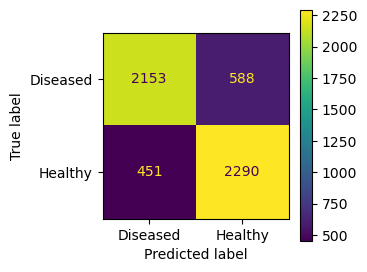

In [31]:
cm_train = confusion_matrix(y_train_sm, y_train_pred)
disp = ConfusionMatrixDisplay(cm_train,display_labels=clf_lr.classes_);
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(3)
fig.set_figheight(3)

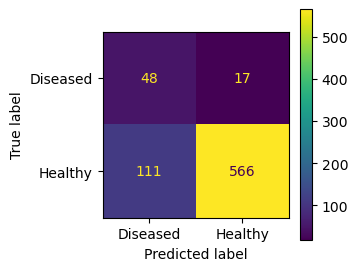

In [32]:
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test,display_labels=clf_lr.classes_);
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(3)
fig.set_figheight(3)

In [33]:
print("The f1 score in the TRAIN set is: {:.3f}".format(f1_score(y_train_sm, y_train_pred, pos_label="Diseased")))
print("The f1 score in the TEST  set is: {:.3f}".format(f1_score(y_test, y_test_pred, pos_label="Diseased")))

The f1 score in the TRAIN set is: 0.806
The f1 score in the TEST  set is: 0.429


**Logistic regression model with bagging (Upsampling)**

In [34]:
LR = LogisticRegression(solver = "liblinear")
clf_lr = BaggingClassifier(base_estimator=LR, random_state=50, n_estimators = 5)
clf_lr.fit(X_train_scaled_up, y_train_up)

BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear'),
                  n_estimators=5, random_state=50)

In [35]:
y_train_pred = clf_lr.predict(X_train_scaled_up)
y_test_pred  = clf_lr.predict(X_test_scaled)

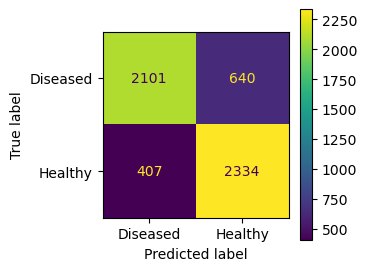

In [36]:
cm_train = confusion_matrix(y_train_up, y_train_pred)
disp = ConfusionMatrixDisplay(cm_train,display_labels=clf_lr.classes_);
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(3)
fig.set_figheight(3)

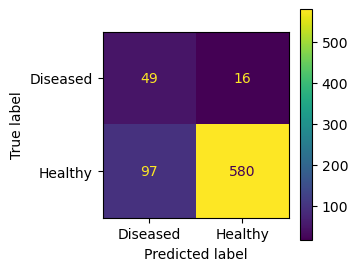

In [37]:
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test,display_labels=clf_lr.classes_);
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(3)
fig.set_figheight(3)

In [38]:
print("The f1 score in the TRAIN set is: {:.3f}".format(f1_score(y_train_up, y_train_pred, pos_label="Diseased")))
print("The f1 score in the TEST  set is: {:.3f}".format(f1_score(y_test, y_test_pred, pos_label="Diseased")))

The f1 score in the TRAIN set is: 0.801
The f1 score in the TEST  set is: 0.464


### K nearest neighbor ###

In [39]:
error_rate = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled_sm, y_train_sm)
    pred_k = knn.predict(X_test_scaled)
    error_rates = 1 - accuracy_score(pred_k,y_test)
    error_rate.append(error_rates)

Text(0, 0.5, 'Error Rate')

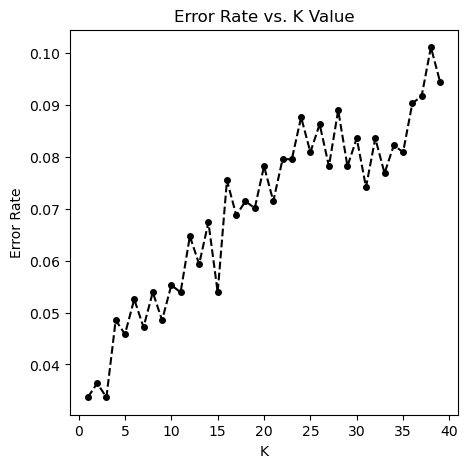

In [40]:
plt.figure(figsize=(5,5))
plt.plot(range(1,40),error_rate,color="black", linestyle="dashed", marker="o",
 markerfacecolor="black", markersize=4)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [41]:
KNN = KNeighborsClassifier()
clf_knn = BaggingClassifier(base_estimator=KNN, random_state=50)
scorer = make_scorer(f1_score, pos_label = "Diseased")

n_neighbors = [3,4,5,6]
weights = ['uniform', 'distance']
p = [1,2] 
n_estimators = [5,10]

grid_knn = {'base_estimator__n_neighbors': n_neighbors,
           'base_estimator__weights': weights,
           'base_estimator__p': p,
           'n_estimators': n_estimators}

In [42]:
grid_search = GridSearchCV(estimator = clf_knn, 
                           scoring = scorer, 
                           param_grid = grid_knn, 
                           cv = 5, 
                           verbose = 2)

In [43]:
knn_grid = grid_search.fit(X_train_scaled_sm, y_train_sm)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END base_estimator__n_neighbors=3, base_estimator__p=1, base_estimator__weights=uniform, n_estimators=5; total time=   0.2s
[CV] END base_estimator__n_neighbors=3, base_estimator__p=1, base_estimator__weights=uniform, n_estimators=5; total time=   0.1s
[CV] END base_estimator__n_neighbors=3, base_estimator__p=1, base_estimator__weights=uniform, n_estimators=5; total time=   0.1s
[CV] END base_estimator__n_neighbors=3, base_estimator__p=1, base_estimator__weights=uniform, n_estimators=5; total time=   0.1s
[CV] END base_estimator__n_neighbors=3, base_estimator__p=1, base_estimator__weights=uniform, n_estimators=5; total time=   0.1s
[CV] END base_estimator__n_neighbors=3, base_estimator__p=1, base_estimator__weights=uniform, n_estimators=10; total time=   0.3s
[CV] END base_estimator__n_neighbors=3, base_estimator__p=1, base_estimator__weights=uniform, n_estimators=10; total time=   0.2s
[CV] END base_estimator__n_neighb

[CV] END base_estimator__n_neighbors=4, base_estimator__p=2, base_estimator__weights=uniform, n_estimators=5; total time=   0.1s
[CV] END base_estimator__n_neighbors=4, base_estimator__p=2, base_estimator__weights=uniform, n_estimators=5; total time=   0.1s
[CV] END base_estimator__n_neighbors=4, base_estimator__p=2, base_estimator__weights=uniform, n_estimators=10; total time=   0.3s
[CV] END base_estimator__n_neighbors=4, base_estimator__p=2, base_estimator__weights=uniform, n_estimators=10; total time=   0.2s
[CV] END base_estimator__n_neighbors=4, base_estimator__p=2, base_estimator__weights=uniform, n_estimators=10; total time=   0.2s
[CV] END base_estimator__n_neighbors=4, base_estimator__p=2, base_estimator__weights=uniform, n_estimators=10; total time=   0.2s
[CV] END base_estimator__n_neighbors=4, base_estimator__p=2, base_estimator__weights=uniform, n_estimators=10; total time=   0.2s
[CV] END base_estimator__n_neighbors=4, base_estimator__p=2, base_estimator__weights=distanc

[CV] END base_estimator__n_neighbors=6, base_estimator__p=1, base_estimator__weights=uniform, n_estimators=10; total time=   0.3s
[CV] END base_estimator__n_neighbors=6, base_estimator__p=1, base_estimator__weights=uniform, n_estimators=10; total time=   0.3s
[CV] END base_estimator__n_neighbors=6, base_estimator__p=1, base_estimator__weights=uniform, n_estimators=10; total time=   0.3s
[CV] END base_estimator__n_neighbors=6, base_estimator__p=1, base_estimator__weights=distance, n_estimators=5; total time=   0.2s
[CV] END base_estimator__n_neighbors=6, base_estimator__p=1, base_estimator__weights=distance, n_estimators=5; total time=   0.1s
[CV] END base_estimator__n_neighbors=6, base_estimator__p=1, base_estimator__weights=distance, n_estimators=5; total time=   0.1s
[CV] END base_estimator__n_neighbors=6, base_estimator__p=1, base_estimator__weights=distance, n_estimators=5; total time=   0.1s
[CV] END base_estimator__n_neighbors=6, base_estimator__p=1, base_estimator__weights=dista

In [44]:
print('Best parameters:', knn_grid.best_params_)

Best parameters: {'base_estimator__n_neighbors': 3, 'base_estimator__p': 1, 'base_estimator__weights': 'distance', 'n_estimators': 10}


**KNN with bagging (SMOTE)**

In [45]:
KNN = KNeighborsClassifier(n_neighbors = 3, p = 1, weights = "distance")
clf_knn = BaggingClassifier(base_estimator=KNN, random_state=50, n_estimators = 10)
clf_knn.fit(X_train_scaled_sm, y_train_sm)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3, p=1,
                                                      weights='distance'),
                  random_state=50)

In [46]:
y_train_pred = clf_knn.predict(X_train_scaled_sm)
y_test_pred  = clf_knn.predict(X_test_scaled)

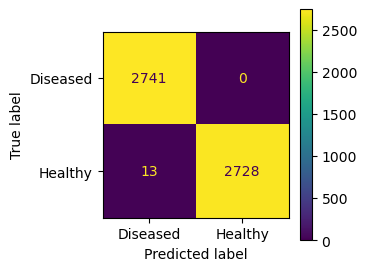

In [47]:
cm_train = confusion_matrix(y_train_sm, y_train_pred)
disp = ConfusionMatrixDisplay(cm_train,display_labels=clf_knn.classes_);
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(3)
fig.set_figheight(3)

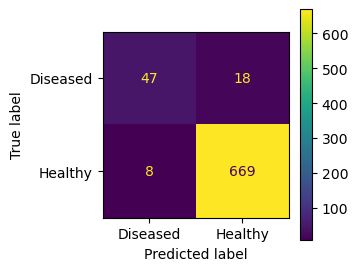

In [48]:
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test,display_labels=clf_knn.classes_);
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(3)
fig.set_figheight(3)

In [49]:
print("The f1 score in the TRAIN set is: {:.3f}".format(f1_score(y_train_sm, y_train_pred, pos_label="Diseased")))
print("The f1 score in the TEST  set is: {:.3f}".format(f1_score(y_test, y_test_pred, pos_label="Diseased")))

The f1 score in the TRAIN set is: 0.998
The f1 score in the TEST  set is: 0.783


**KNN with bagging (Upscaling)**

In [50]:
KNN = KNeighborsClassifier(n_neighbors = 3, p = 1, weights = "distance")
clf_knn = BaggingClassifier(base_estimator=KNN, random_state=50, n_estimators = 10)
clf_knn.fit(X_train_scaled_up, y_train_up)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3, p=1,
                                                      weights='distance'),
                  random_state=50)

In [51]:
y_train_pred = clf_knn.predict(X_train_scaled_up)
y_test_pred  = clf_knn.predict(X_test_scaled)

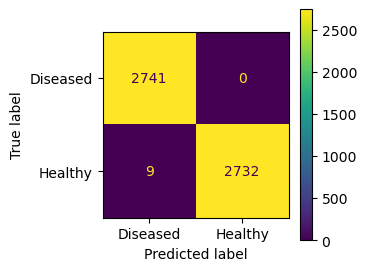

In [52]:
cm_train = confusion_matrix(y_train_up, y_train_pred)
disp = ConfusionMatrixDisplay(cm_train,display_labels=clf_knn.classes_);
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(3)
fig.set_figheight(3)

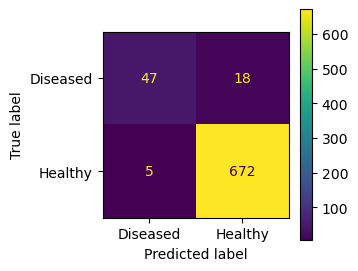

In [53]:
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test,display_labels=clf_knn.classes_);
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(3)
fig.set_figheight(3)

In [54]:
print("The f1 score in the TRAIN set is: {:.3f}".format(f1_score(y_train_up, y_train_pred, pos_label="Diseased")))
print("The f1 score in the TEST  set is: {:.3f}".format(f1_score(y_test, y_test_pred, pos_label="Diseased")))

The f1 score in the TRAIN set is: 0.998
The f1 score in the TEST  set is: 0.803


### Naive bayes ###

In [55]:
NB = GaussianNB()
clf_nb = BaggingClassifier(base_estimator=NB, random_state=50)
scorer = make_scorer(f1_score, pos_label = "Diseased")

n_estimators = [5,10, 15]

grid_nb = {'n_estimators': n_estimators}

In [56]:
grid_search = GridSearchCV(estimator = clf_nb, 
                           scoring = scorer, 
                           param_grid = grid_nb, 
                           cv = 5, 
                           verbose = 2)

In [57]:
nb_grid = grid_search.fit(X_train_scaled_sm, y_train_sm)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END .....................................n_estimators=5; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=15; total time=   0.0s
[CV] END ....................................n_es

In [58]:
print('Best parameters:', nb_grid.best_params_)

Best parameters: {'n_estimators': 15}


**Naive bayes with bagging (SMOTE)**

In [59]:
NB = GaussianNB()
clf_nb = BaggingClassifier(base_estimator=NB, random_state=50, n_estimators =15)
clf_nb.fit(X_train_scaled_sm, y_train_sm)

BaggingClassifier(base_estimator=GaussianNB(), n_estimators=15, random_state=50)

In [60]:
y_train_pred = clf_nb.predict(X_train_scaled_sm)
y_test_pred  = clf_nb.predict(X_test_scaled)

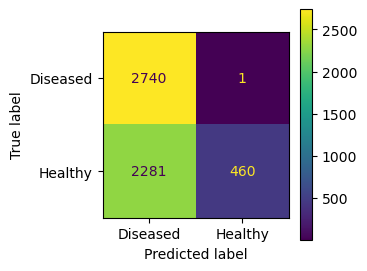

In [61]:
cm_train = confusion_matrix(y_train_sm, y_train_pred)
disp = ConfusionMatrixDisplay(cm_train,display_labels=clf_nb.classes_);
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(3)
fig.set_figheight(3)

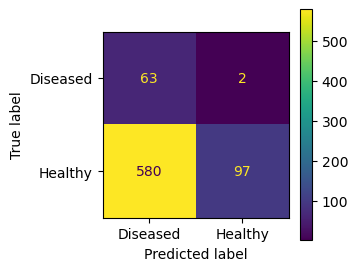

In [62]:
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test,display_labels=clf_nb.classes_);
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(3)
fig.set_figheight(3)

In [63]:
print("The f1 score in the TRAIN set is: {:.3f}".format(f1_score(y_train_sm, y_train_pred, pos_label="Diseased")))
print("The f1 score in the TEST  set is: {:.3f}".format(f1_score(y_test, y_test_pred, pos_label="Diseased")))

The f1 score in the TRAIN set is: 0.706
The f1 score in the TEST  set is: 0.178


**Naive bayes with bagging (Upscaling)**

In [64]:
NB = GaussianNB()
clf_nb = BaggingClassifier(base_estimator=NB, random_state=50, n_estimators =15)
clf_nb.fit(X_train_scaled_up, y_train_up)

BaggingClassifier(base_estimator=GaussianNB(), n_estimators=15, random_state=50)

In [65]:
y_train_pred = clf_nb.predict(X_train_scaled_up)
y_test_pred  = clf_nb.predict(X_test_scaled)

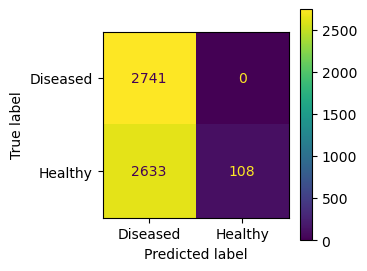

In [66]:
cm_train = confusion_matrix(y_train_up, y_train_pred)
disp = ConfusionMatrixDisplay(cm_train,display_labels=clf_nb.classes_);
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(3)
fig.set_figheight(3)

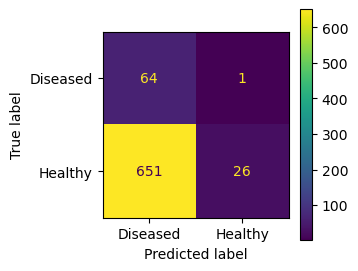

In [67]:
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test,display_labels=clf_nb.classes_);
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(3)
fig.set_figheight(3)

In [159]:
print("The f1 score in the TRAIN set is: {:.3f}".format(f1_score(y_train_up, y_train_pred, pos_label="Diseased")))
print("The f1 score in the TEST  set is: {:.3f}".format(f1_score(y_test, y_test_pred, pos_label="Diseased")))

The f1 score in the TRAIN set is: 1.000
The f1 score in the TEST  set is: 0.956


### Random Forest ###

In [160]:
scorer = make_scorer(f1_score, pos_label = "Diseased")

n_estimators = [50,100, 150]
criterion = ["entropy"]
max_depth_choices= [3,5,10,15] 
min_samples_split_choices = [2,3,5] 
min_samples_leaf_choices = [1,2,3] 
max_features_choices = ["sqrt", "log2"]

grid = {'n_estimators': n_estimators,
        'criterion': criterion,
        'max_depth': max_depth_choices,
        'min_samples_split': min_samples_split_choices, 
        'min_samples_leaf': min_samples_leaf_choices,
        'max_features': max_features_choices
       }

In [161]:
rf_clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf_clf, 
                           scoring = scorer, 
                           param_grid = grid, 
                           cv = 5, 
                           verbose = 2)

In [162]:
rf_grid = grid_search.fit(X_train_scaled_sm, y_train_sm)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators

[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth

[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_dept

[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, m

[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, m

In [262]:
print('Best parameters:', rf_grid.best_params_)

Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}


**Random Forest (SMOTE)**

In [263]:
rf_clf = RandomForestClassifier(criterion = "entropy", max_depth = 15, min_samples_split = 3, max_features = "log2")

In [264]:
rf_clf.fit(X_train_scaled_sm, y_train_sm)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       min_samples_split=3)

In [265]:
y_train_pred = rf_clf.predict(X_train_scaled_sm)
y_test_pred  = rf_clf.predict(X_test_scaled)

In [266]:
filename = "./models/rf_clf" +".pickle"
with open(filename, "wb") as file:
    pickle.dump(rf_clf,file)

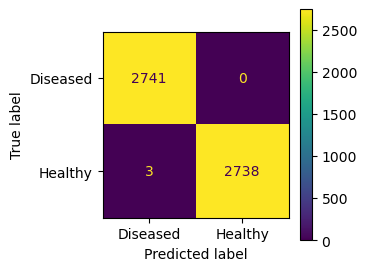

In [267]:
cm_train = confusion_matrix(y_train_sm, y_train_pred)
disp = ConfusionMatrixDisplay(cm_train,display_labels=rf_clf.classes_);
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(3)
fig.set_figheight(3)

fig.savefig('./streamlit/images/rf_cm_train.png', bbox_inches='tight')

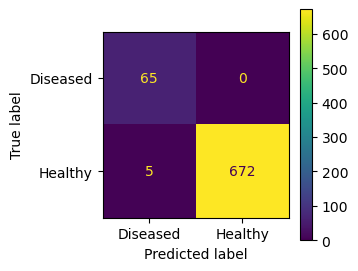

In [268]:
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test,display_labels=rf_clf.classes_);
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(3)
fig.set_figheight(3)

fig.savefig('./streamlit/images/rf_cm_test.png', bbox_inches='tight')

In [269]:
print("The f1 score in the TRAIN set is: {:.3f}".format(f1_score(y_train_sm, y_train_pred, pos_label="Diseased")))
print("The f1 score in the TEST  set is: {:.3f}".format(f1_score(y_test, y_test_pred, pos_label="Diseased")))

The f1 score in the TRAIN set is: 0.999
The f1 score in the TEST  set is: 0.963


In [317]:
col = ["sex" ,"on_thyroxine" ,"on_anthithyroid_medication" ,"pregnant", "goitre", "tsh", "t3", "fti"]
y =  rf_clf.feature_importances_
df = pd.DataFrame(y, col).reset_index()
df.columns = ["column", "fi"]
df = df.sort_values("fi", ascending=False)
df


,column,fi
5,tsh,0.779322
7,fti,0.134044
6,t3,0.042694
1,on_thyroxine,0.036512
0,sex,0.005302
3,pregnant,0.001101
2,on_anthithyroid_medication,0.000613
4,goitre,0.000412


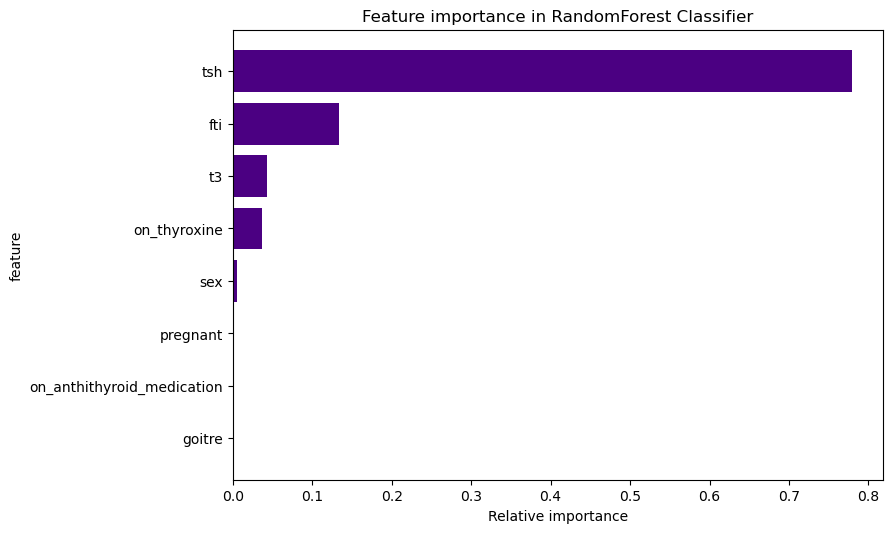

<Figure size 500x500 with 0 Axes>

In [323]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cols = list(df["column"])
fi = list(df["fi"])
ax.barh(cols,fi, color="indigo")
plt.gca().invert_yaxis()
plt.title("Feature importance in RandomForest Classifier")
plt.xlabel("Relative importance")
plt.ylabel("feature") 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)
plt.show()

fig.savefig('./streamlit/images/rf_feature_importance.png', bbox_inches='tight')

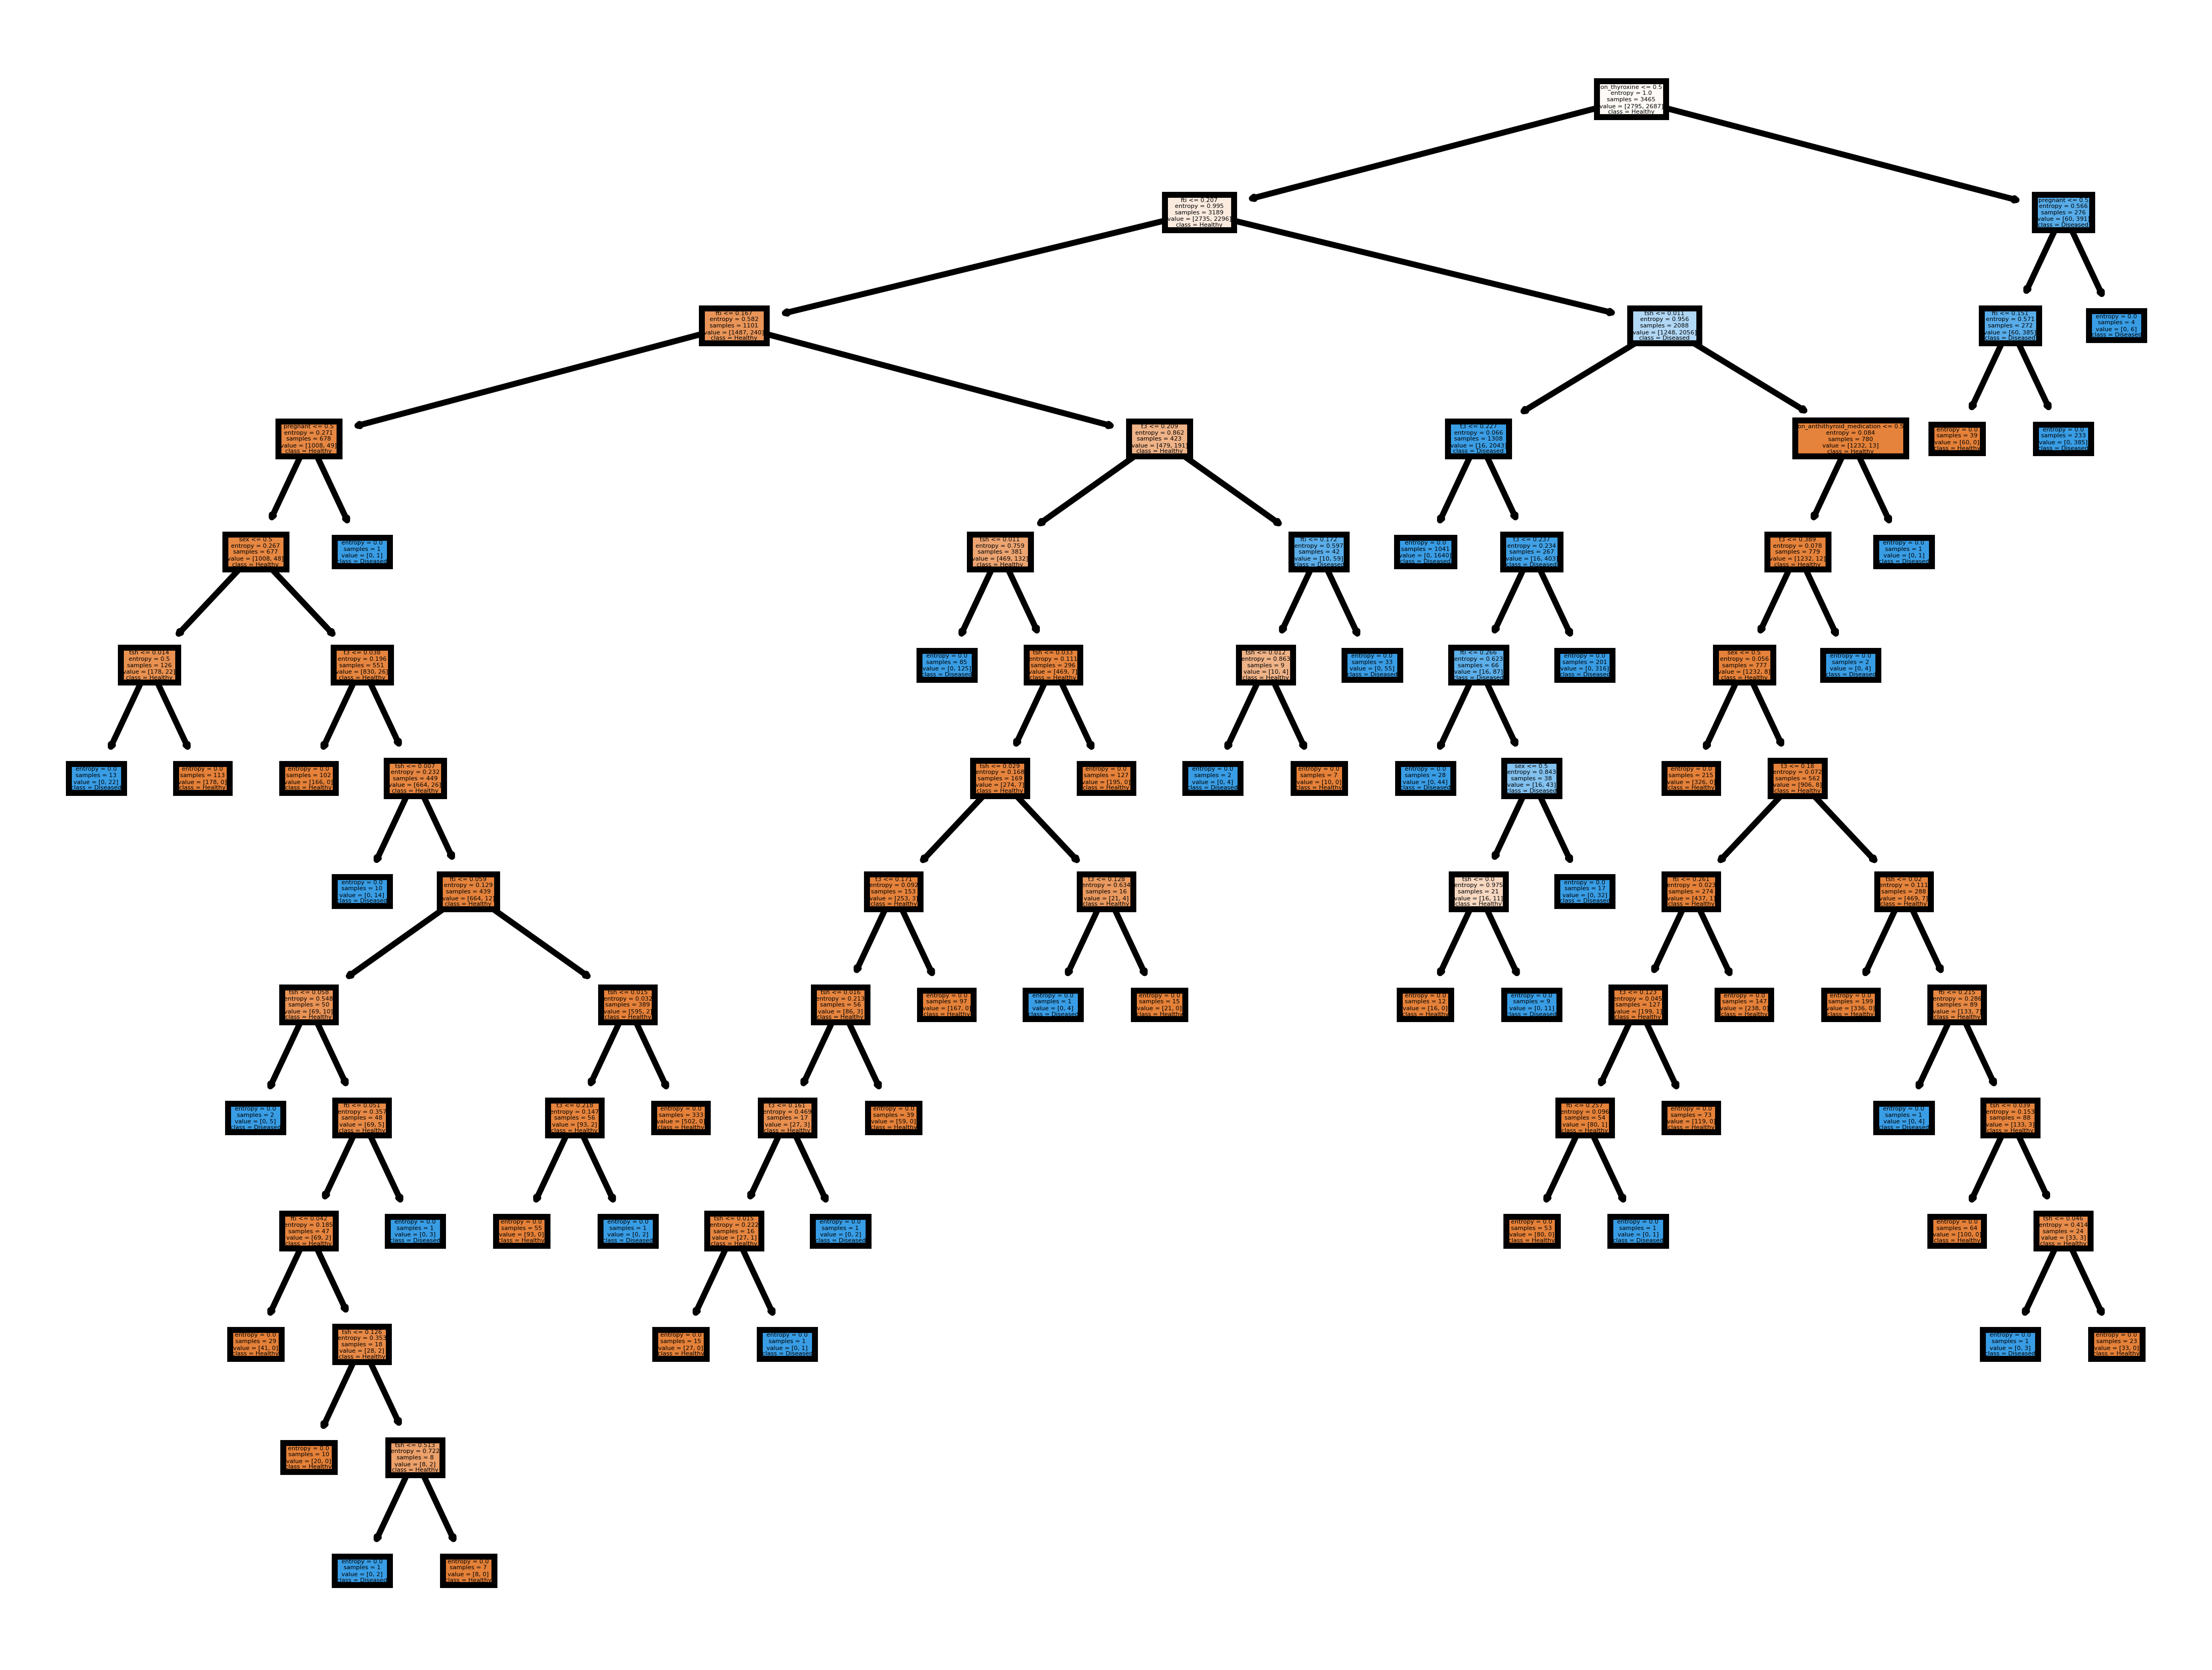

In [324]:
fn=col
cn=["Healthy", "Diseased"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,dpi=800)
tree.plot_tree(rf_clf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('./streamlit/images/rf_individualtree.png')

In [272]:
print("Results obtained for the TRAIN SET")
print("==================================")
print(classification_report(y_train_sm, y_train_pred))

Results obtained for the TRAIN SET
              precision    recall  f1-score   support

    Diseased       1.00      1.00      1.00      2741
     Healthy       1.00      1.00      1.00      2741

    accuracy                           1.00      5482
   macro avg       1.00      1.00      1.00      5482
weighted avg       1.00      1.00      1.00      5482



In [273]:
print("Results obtained for the TEST SET")
print("==================================")
print(classification_report(y_test, y_test_pred))

Results obtained for the TEST SET
              precision    recall  f1-score   support

    Diseased       0.93      1.00      0.96        65
     Healthy       1.00      0.99      1.00       677

    accuracy                           0.99       742
   macro avg       0.96      1.00      0.98       742
weighted avg       0.99      0.99      0.99       742



**Random Forest (Upsampling)**

In [274]:
rf_clf = RandomForestClassifier(criterion = "entropy", max_depth = 15, min_samples_split = 3, max_features = "log2")

In [275]:
rf_clf.fit(X_train_scaled_up, y_train_up)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       min_samples_split=3)

In [276]:
y_train_pred = rf_clf.predict(X_train_scaled_up)
y_test_pred  = rf_clf.predict(X_test_scaled)

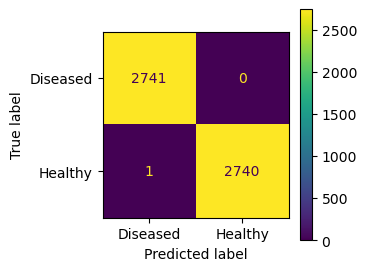

In [277]:
cm_train = confusion_matrix(y_train_up, y_train_pred)
disp = ConfusionMatrixDisplay(cm_train,display_labels=rf_clf.classes_);
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(3)
fig.set_figheight(3)

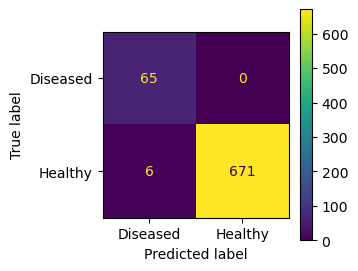

In [278]:
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test,display_labels=rf_clf.classes_);
disp.plot()
fig = disp.ax_.get_figure() 
fig.set_figwidth(3)
fig.set_figheight(3)

In [279]:
print("The f1 score in the TRAIN set is: {:.3f}".format(f1_score(y_train_up, y_train_pred, pos_label="Diseased")))
print("The f1 score in the TEST  set is: {:.3f}".format(f1_score(y_test, y_test_pred, pos_label="Diseased")))

The f1 score in the TRAIN set is: 1.000
The f1 score in the TEST  set is: 0.956
